<a href="https://colab.research.google.com/github/lgy112112/Fastai_LiverTumor_Segmentation_Tutorial/blob/main/LiTS_2D_UNet_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install segmentation-models-pytorch
!pip install lightning

import numpy as np
import nibabel as nib
import os
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
from segmentation_models_pytorch import utils
import albumentations as A
from albumentations.pytorch import ToTensorV2

import lightning as L
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 947.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

# **Data Readin** and Do Some Check🫤🫤🙁


In [ ]:
# !rm -rf /content/drive/MyDrive/npy_dataset/npy_images
# !rm -rf /content/drive/MyDrive/npy_dataset/npy_labels

In [ ]:
# import numpy as np
# import nibabel as nib
# import os
# from tqdm.notebook import tqdm
# # 定义存储图像和标签的目录路径
# image_dir = '/content/drive/MyDrive/volumes'
# label_dir = '/content/drive/MyDrive/segmentations'

# # 定义输出目录
# !mkdir -p /content/drive/MyDrive/npy_dataset/npy_images
# output_dir_images = '/content/drive/MyDrive/npy_dataset/npy_images'

# !mkdir -p /content/drive/MyDrive/npy_dataset/npy_labels
# output_dir_labels = '/content/drive/MyDrive/npy_dataset/npy_labels'

# # 确保输出目录存在
# os.makedirs(output_dir_images, exist_ok=True)
# os.makedirs(output_dir_labels, exist_ok=True)

# total_files = 51

# for i in tqdm(range(total_files), desc='转换进度'):
#     # 构建文件名
#     image_filename = f'volume-{i}.nii'
#     label_filename = f'segmentation-{i}.nii'

#     # 构建完整的文件路径
#     image_path = os.path.join(image_dir, image_filename)
#     label_path = os.path.join(label_dir, label_filename)

#     # 加载图像和标签文件
#     image = nib.load(image_path).get_fdata()
#     label = nib.load(label_path).get_fdata()

#     # 获取图像的层数
#     num_slices = image.shape[-1]
#     num_slices_label = label.shape[-1]

#     print(f'image {i} 的层数为 {num_slices}。')
#     print(f'label {i} 的层数为 {num_slices_label}。')

#     # 循环遍历每一层
#     for slice_index in tqdm(range(num_slices_label)):
#         # 提取当前层的图像和标签
#         image_slice = image[:, :, slice_index]
#         label_slice = label[:, :, slice_index]

#         # 保存当前层为npy格式
#         np.save(os.path.join(output_dir_images, f'image_{i}_slice_{slice_index}.npy'), image_slice)
#         np.save(os.path.join(output_dir_labels, f'label_{i}_slice_{slice_index}.npy'), label_slice)

#     print(f'卷积 {i} 的所有层已成功保存为npy格式。')


转换进度:   0%|          | 0/51 [00:00<?, ?it/s]

image 0 的层数为 75。
label 0 的层数为 75。


  0%|          | 0/75 [00:00<?, ?it/s]

卷积 0 的所有层已成功保存为npy格式。
image 1 的层数为 123。
label 1 的层数为 123。


  0%|          | 0/123 [00:00<?, ?it/s]

卷积 1 的所有层已成功保存为npy格式。
image 2 的层数为 517。
label 2 的层数为 517。


  0%|          | 0/517 [00:00<?, ?it/s]

卷积 2 的所有层已成功保存为npy格式。
image 3 的层数为 534。
label 3 的层数为 534。


  0%|          | 0/534 [00:00<?, ?it/s]

卷积 3 的所有层已成功保存为npy格式。
image 4 的层数为 841。
label 4 的层数为 841。


  0%|          | 0/841 [00:00<?, ?it/s]

卷积 4 的所有层已成功保存为npy格式。
image 5 的层数为 537。
label 5 的层数为 537。


  0%|          | 0/537 [00:00<?, ?it/s]

卷积 5 的所有层已成功保存为npy格式。
image 6 的层数为 518。
label 6 的层数为 518。


  0%|          | 0/518 [00:00<?, ?it/s]

卷积 6 的所有层已成功保存为npy格式。
image 7 的层数为 541。
label 7 的层数为 541。


  0%|          | 0/541 [00:00<?, ?it/s]

卷积 7 的所有层已成功保存为npy格式。
image 8 的层数为 541。
label 8 的层数为 541。


  0%|          | 0/541 [00:00<?, ?it/s]

卷积 8 的所有层已成功保存为npy格式。
image 9 的层数为 549。
label 9 的层数为 549。


  0%|          | 0/549 [00:00<?, ?it/s]

卷积 9 的所有层已成功保存为npy格式。
image 10 的层数为 501。
label 10 的层数为 501。


  0%|          | 0/501 [00:00<?, ?it/s]

卷积 10 的所有层已成功保存为npy格式。
image 11 的层数为 466。
label 11 的层数为 466。


  0%|          | 0/466 [00:00<?, ?it/s]

卷积 11 的所有层已成功保存为npy格式。
image 12 的层数为 455。
label 12 的层数为 455。


  0%|          | 0/455 [00:00<?, ?it/s]

卷积 12 的所有层已成功保存为npy格式。
image 13 的层数为 605。
label 13 的层数为 605。


  0%|          | 0/605 [00:00<?, ?it/s]

卷积 13 的所有层已成功保存为npy格式。
image 14 的层数为 588。
label 14 的层数为 588。


  0%|          | 0/588 [00:00<?, ?it/s]

卷积 14 的所有层已成功保存为npy格式。
image 15 的层数为 565。
label 15 的层数为 565。


  0%|          | 0/565 [00:00<?, ?it/s]

卷积 15 的所有层已成功保存为npy格式。
image 16 的层数为 689。
label 16 的层数为 689。


  0%|          | 0/689 [00:00<?, ?it/s]

卷积 16 的所有层已成功保存为npy格式。
image 17 的层数为 826。
label 17 的层数为 826。


  0%|          | 0/826 [00:00<?, ?it/s]

卷积 17 的所有层已成功保存为npy格式。
image 18 的层数为 845。
label 18 的层数为 845。


  0%|          | 0/845 [00:00<?, ?it/s]

卷积 18 的所有层已成功保存为npy格式。
image 19 的层数为 547。
label 19 的层数为 547。


  0%|          | 0/547 [00:00<?, ?it/s]

卷积 19 的所有层已成功保存为npy格式。
image 20 的层数为 574。
label 20 的层数为 574。


  0%|          | 0/574 [00:00<?, ?it/s]

卷积 20 的所有层已成功保存为npy格式。
image 21 的层数为 437。
label 21 的层数为 437。


  0%|          | 0/437 [00:00<?, ?it/s]

卷积 21 的所有层已成功保存为npy格式。
image 22 的层数为 247。
label 22 的层数为 247。


  0%|          | 0/247 [00:00<?, ?it/s]

卷积 22 的所有层已成功保存为npy格式。
image 23 的层数为 391。
label 23 的层数为 391。


  0%|          | 0/391 [00:00<?, ?it/s]

卷积 23 的所有层已成功保存为npy格式。
image 24 的层数为 276。
label 24 的层数为 276。


  0%|          | 0/276 [00:00<?, ?it/s]

卷积 24 的所有层已成功保存为npy格式。
image 25 的层数为 601。
label 25 的层数为 601。


  0%|          | 0/601 [00:00<?, ?it/s]

卷积 25 的所有层已成功保存为npy格式。
image 26 的层数为 668。
label 26 的层数为 668。


  0%|          | 0/668 [00:00<?, ?it/s]

卷积 26 的所有层已成功保存为npy格式。
image 27 的层数为 861。
label 27 的层数为 861。


  0%|          | 0/861 [00:00<?, ?it/s]

卷积 27 的所有层已成功保存为npy格式。
image 28 的层数为 129。
label 28 的层数为 129。


  0%|          | 0/129 [00:00<?, ?it/s]

卷积 28 的所有层已成功保存为npy格式。
image 29 的层数为 172。
label 29 的层数为 172。


  0%|          | 0/172 [00:00<?, ?it/s]

卷积 29 的所有层已成功保存为npy格式。
image 30 的层数为 200。
label 30 的层数为 200。


  0%|          | 0/200 [00:00<?, ?it/s]

卷积 30 的所有层已成功保存为npy格式。
image 31 的层数为 91。
label 31 的层数为 91。


  0%|          | 0/91 [00:00<?, ?it/s]

卷积 31 的所有层已成功保存为npy格式。
image 32 的层数为 139。
label 32 的层数为 139。


  0%|          | 0/139 [00:00<?, ?it/s]

卷积 32 的所有层已成功保存为npy格式。
image 33 的层数为 135。
label 33 的层数为 135。


  0%|          | 0/135 [00:00<?, ?it/s]

卷积 33 的所有层已成功保存为npy格式。
image 34 的层数为 151。
label 34 的层数为 151。


  0%|          | 0/151 [00:00<?, ?it/s]

卷积 34 的所有层已成功保存为npy格式。
image 35 的层数为 124。
label 35 的层数为 124。


  0%|          | 0/124 [00:00<?, ?it/s]

卷积 35 的所有层已成功保存为npy格式。
image 36 的层数为 111。
label 36 的层数为 111。


  0%|          | 0/111 [00:00<?, ?it/s]

卷积 36 的所有层已成功保存为npy格式。
image 37 的层数为 122。
label 37 的层数为 122。


  0%|          | 0/122 [00:00<?, ?it/s]

卷积 37 的所有层已成功保存为npy格式。
image 38 的层数为 132。
label 38 的层数为 132。


  0%|          | 0/132 [00:00<?, ?it/s]

卷积 38 的所有层已成功保存为npy格式。
image 39 的层数为 260。
label 39 的层数为 260。


  0%|          | 0/260 [00:00<?, ?it/s]

卷积 39 的所有层已成功保存为npy格式。
image 40 的层数为 122。
label 40 的层数为 122。


  0%|          | 0/122 [00:00<?, ?it/s]

卷积 40 的所有层已成功保存为npy格式。
image 41 的层数为 113。
label 41 的层数为 113。


  0%|          | 0/113 [00:00<?, ?it/s]

卷积 41 的所有层已成功保存为npy格式。
image 42 的层数为 125。
label 42 的层数为 125。


  0%|          | 0/125 [00:00<?, ?it/s]

卷积 42 的所有层已成功保存为npy格式。
image 43 的层数为 155。
label 43 的层数为 155。


  0%|          | 0/155 [00:00<?, ?it/s]

卷积 43 的所有层已成功保存为npy格式。
image 44 的层数为 119。
label 44 的层数为 119。


  0%|          | 0/119 [00:00<?, ?it/s]

卷积 44 的所有层已成功保存为npy格式。
image 45 的层数为 74。
label 45 的层数为 74。


  0%|          | 0/74 [00:00<?, ?it/s]

卷积 45 的所有层已成功保存为npy格式。
image 46 的层数为 124。
label 46 的层数为 124。


  0%|          | 0/124 [00:00<?, ?it/s]

卷积 46 的所有层已成功保存为npy格式。
image 47 的层数为 225。
label 47 的层数为 225。


  0%|          | 0/225 [00:00<?, ?it/s]

卷积 47 的所有层已成功保存为npy格式。
image 48 的层数为 244。
label 48 的层数为 244。


  0%|          | 0/244 [00:00<?, ?it/s]

卷积 48 的所有层已成功保存为npy格式。
image 49 的层数为 254。
label 49 的层数为 254。


  0%|          | 0/254 [00:00<?, ?it/s]

卷积 49 的所有层已成功保存为npy格式。
image 50 的层数为 240。
label 50 的层数为 240。


  0%|          | 0/240 [00:00<?, ?it/s]

卷积 50 的所有层已成功保存为npy格式。


Image File: image_1_slice_66.npy
Image Shape: (512, 512)
Unique Values in Image: [-3024. -1024. -1023. ...   869.   893.   910.]
Label File: label_1_slice_66.npy
Label Shape: (512, 512)
Unique Values in Label: [0. 1. 2.]


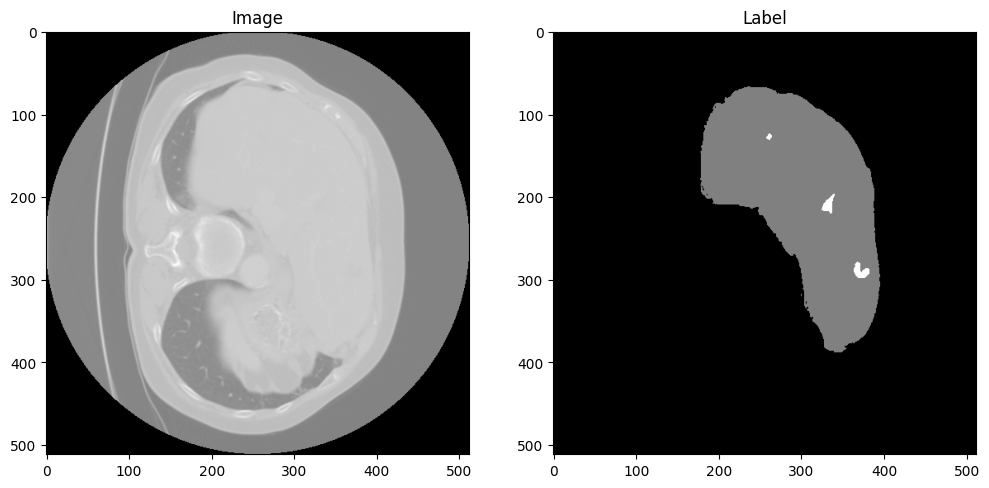

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# 定义存储npy图像和标签的目录路径
npy_image_dir = '/content/drive/MyDrive/npy_dataset/npy_images'
npy_label_dir = '/content/drive/MyDrive/npy_dataset/npy_labels'


# 获取目录中的所有文件列表
image_files = os.listdir(npy_image_dir)
label_files = os.listdir(npy_label_dir)

# 随机选择一个文件
random_index = random.randint(0, len(image_files) - 1)
selected_image_file = image_files[random_index]
selected_label_file = label_files[random_index]

# 构建完整的文件路径
selected_image_path = os.path.join(npy_image_dir, selected_image_file)
selected_label_path = os.path.join(npy_label_dir, selected_label_file)

# 加载npy文件
image = np.load(selected_image_path)
label = np.load(selected_label_path)

# 获取图像的信息
image_shape = image.shape
label_shape = label.shape
unique_values_in_image = np.unique(image)
unique_values_in_label = np.unique(label)

# 打印图像信息
print(f"Image File: {selected_image_file}")
print(f"Image Shape: {image_shape}")
print(f"Unique Values in Image: {unique_values_in_image}")
print(f"Label File: {selected_label_file}")
print(f"Label Shape: {label_shape}")
print(f"Unique Values in Label: {unique_values_in_label}")

# 显示图像和标签
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(label, cmap='gray')
ax[1].set_title('Label')
plt.show()


In [ ]:
len(image_files), len(label_files)

(9267, 9267)

In [ ]:
import os

# 定义存储npy图像和标签的目录路径
npy_image_dir = '/content/drive/MyDrive/npy_dataset/npy_images'
npy_label_dir = '/content/drive/MyDrive/npy_dataset/npy_labels'

# 获取目录中的所有文件列表
image_files = os.listdir(npy_image_dir)
label_files = os.listdir(npy_label_dir)

# 假设图像文件和标签文件除了一个关键字（比如'image'和'label'）外，其余部分文件名相同
# 创建一个基于图像文件生成的标签文件名的集合
generated_label_files = {f.replace('image', 'label') for f in image_files}

# 实际的标签文件名的集合
actual_label_files = set(label_files)

# 找出缺失的标签文件
missing_label_files = generated_label_files - actual_label_files

# 打印缺失的文件
if missing_label_files:
    print("缺失的标签文件:")
    for file in missing_label_files:
        print(file)
else:
    print("没有缺失的标签文件。")


没有缺失的标签文件。


In [ ]:
!rm -rf /content/drive/MyDrive/npy_dataset/npy_images/image_17_slice_622.npy

# **Data Set, Load, Train!😡**

In [3]:
# import os
# import numpy as np
# import torch
# import albumentations as A
# from albumentations.pytorch import ToTensorV2
# from torch.utils.data import Dataset, DataLoader
# from sklearn.model_selection import train_test_split

# 定义存储npy图像和标签的目录路径
npy_image_dir = '/content/drive/MyDrive/npy_dataset/npy_images'
npy_label_dir = '/content/drive/MyDrive/npy_dataset/npy_labels'

image_files = sorted(os.listdir(npy_image_dir))
label_files = sorted(os.listdir(npy_label_dir))

# 分割数据集（这里以80%训练，20%测试为例）
train_images, val_images, train_labels, val_labels = train_test_split(
    image_files, label_files, test_size=0.2, random_state=42)

len(train_images), len(val_images), len(train_labels), len(val_labels)

(7413, 1854, 7413, 1854)

In [4]:

# 定义数据增强
train_transform = A.Compose([
    # A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomRotate90(),
    A.Normalize(mean=(0.5,), std=(0.5,)),
    ToTensorV2(),
])

val_transform = A.Compose([
    # A.Resize(256, 256),
    A.Normalize(mean=(0.5,), std=(0.5,)),
    ToTensorV2(),
])


In [5]:

class OrganSegmentationDataset(Dataset):
    def __init__(self, image_files, label_files, transform=None):
        self.image_files = image_files
        self.label_files = label_files
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image_path = os.path.join(npy_image_dir, self.image_files[idx])
        label_path = os.path.join(npy_label_dir, self.label_files[idx])

        image = np.load(image_path)
        label = np.load(label_path)

        if self.transform:
            augmented = self.transform(image=image, mask=label)
            image = augmented['image']
            label = augmented['mask']
        else:
            # 如果没有transform，直接将numpy数组转换为torch张量
            image = torch.from_numpy(image).float()
            label = torch.from_numpy(label).long()  # 现在可以安全地调用.long()

        return image, label


Image shape: torch.Size([512, 512])
Label shape: torch.Size([512, 512])
Unique values in the label: [0]


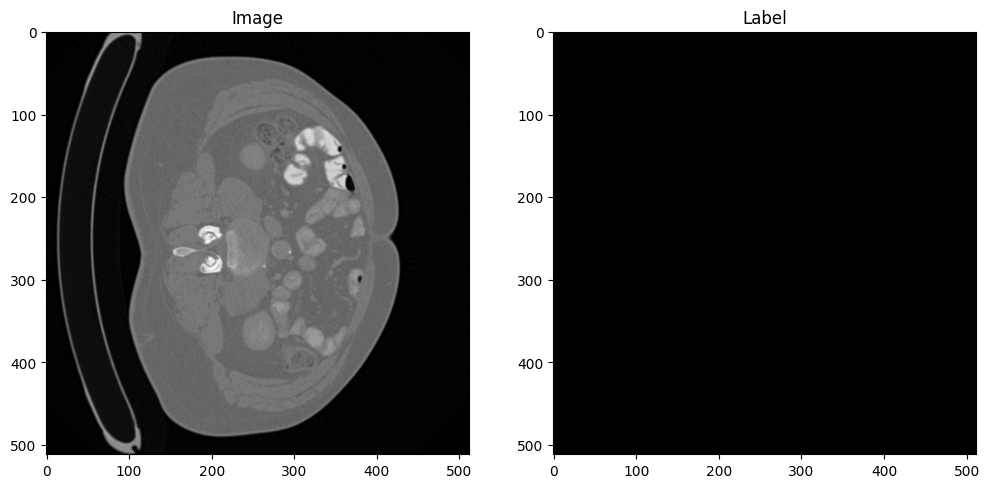

In [ ]:
dataset = OrganSegmentationDataset(image_files=image_files, label_files=label_files, transform=None)

# 选择要查看的样本索引
sample_index = 251

# 加载一个样本
image, label = dataset[sample_index]

# 将tensor转换为numpy数组（如果使用了transforms.ToTensor()）
# 如果没有使用该转换，可以跳过此步骤
# image = image.numpy()
# label = label.numpy()

# 打印形状和维度信息
print(f"Image shape: {image.shape}")
print(f"Label shape: {label.shape}")
print(f"Unique values in the label: {np.unique(label)}")

# 显示图像和标签
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image.squeeze(), cmap='gray')  # 使用squeeze()以防image有多余的维度
axes[0].set_title('Image')
axes[1].imshow(label.squeeze(), cmap='gray')  # 同上
axes[1].set_title('Label')
plt.show()

# **Train *Released*😂**

In [ ]:

class UNetModel(L.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = smp.Unet(
            encoder_name="resnet34",  # 使用ResNet34作为编码器
            encoder_weights="imagenet",
            in_channels=1,  # 根据你的数据集修改
            classes=3,  # 背景、肝脏、肿瘤
        )
        self.loss_fn = nn.CrossEntropyLoss()


    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self.forward(images) # debug .shape
        # print(f"Outputs shape: {outputs.shape}, Labels shape: {labels.shape}")  # 打印形状
        # print(f"Outputs datatype: {outputs.dtype}, Labels data type: {labels.dtype}")  # 打印数据类型
        loss = self.loss_fn(outputs, labels.long())
        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self.forward(images)
        loss = self.loss_fn(outputs, labels.long())
        self.log("val_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer


In [ ]:
# !pip install -U 'torch_xla>=1.13'

In [ ]:
# 创建数据集和数据加载器
train_dataset = OrganSegmentationDataset(train_images, train_labels, transform=train_transform)
val_dataset = OrganSegmentationDataset(val_images, val_labels, transform=val_transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=0)

# 创建模型
model = UNetModel()

# 使用PyTorch Lightning的Trainer启动训练
# trainer = L.Trainer(max_epochs=10)
trainer = L.Trainer(accelerator='gpu', max_epochs=1)

trainer.fit(model, train_loader, val_loader)


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/configuration_validator.py:72: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name    | Type             | Params
---------------------------------------------
0 | model   | Unet             | 24.4 M
1 | loss_fn | CrossEntropyLoss | 0     
----------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=1` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
import matplotlib.pyplot as plt
import torch

# 确保在这一步之前已经定义并训练了 model 和 train_loader

# 从数据加载器中获取一批数据
batch = next(iter(train_loader))
images, masks = batch

# 选择用于预测的图片和掩码
image = images[0].unsqueeze(0)  # 添加批次维度
mask = masks[0]

# 确保模型处于评估模式
model.eval()

# 将图像移动到模型所在的设备上
device = next(model.parameters()).device  # 获取模型的设备
image = image.to(device)

# 进行预测
with torch.no_grad():
    prediction = model(image)
    prediction = torch.argmax(prediction, dim=1).squeeze(0).cpu()  # 获取预测类别并移回CPU

# 可视化
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
axs[0].imshow(image.squeeze().cpu().numpy(), cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(mask.cpu().numpy(), cmap='gray')
axs[1].set_title('True Mask')
axs[2].imshow(prediction.numpy(), cmap='gray')
axs[2].set_title('Predicted Mask')
axs[3].imshow(prediction.numpy(), cmap='gray')
axs[3].set_title('Predicted Mask')
plt.show()


# **Pioneer Workflow Preview**

In [16]:
class MultipleImageDataset(Dataset):
    def __init__(self, image_paths, label_paths, transform=None):
        """
        image_paths: 图像文件路径列表
        label_paths: 标签文件路径列表
        transform: 应用于图像和标签的转换操作
        """
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.transform = transform

    def __len__(self):
        # 假设图像和标签列表长度相等
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])
        label = np.load(self.label_paths[idx])

        if self.transform:
            augmented = self.transform(image=image, mask=label)
            image = augmented['image']
            label = augmented['mask']
        else:
            image = torch.from_numpy(image).unsqueeze(0).float()  # 添加通道维度
            label = torch.from_numpy(label).long()

        return image, label

# 定义数据集和数据加载器
image_paths = [
    '/content/drive/MyDrive/npy_dataset/npy_images/image_1_slice_66.npy',
    '/content/drive/MyDrive/npy_dataset/npy_images/image_1_slice_66.npy'
]
label_paths = [
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_1_slice_66.npy',
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_1_slice_66.npy'
]

dataset = MultipleImageDataset(image_paths, label_paths)
loader = DataLoader(dataset, batch_size=1, shuffle=True)

# 验证集
val_image_paths = [
    '/content/drive/MyDrive/npy_dataset/npy_images/image_1_slice_66.npy',
    '/content/drive/MyDrive/npy_dataset/npy_images/image_1_slice_66.npy'
]
val_label_paths = [
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_1_slice_66.npy',
    '/content/drive/MyDrive/npy_dataset/npy_labels/label_1_slice_66.npy'
]

# 创建验证数据集
val_dataset = MultipleImageDataset(val_image_paths, val_label_paths)

# 创建验证数据加载器
valid_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

def plot_images(original, mask, prediction, epoch):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Original Image')
    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title('True Mask')
    axs[2].imshow(prediction, cmap='gray')
    axs[2].set_title('Prediction')
    plt.suptitle(f'Epoch {epoch}')
    plt.show()

# introduce fastai loss func
from fastai.losses import *
import torchmetrics
class UNetTestModel(L.LightningModule):
    def __init__(self, image_path, label_path):
        super().__init__()
        self.model = smp.Unet(encoder_name="resnet34", encoder_weights="imagenet",
                              in_channels=1, classes=3)
        self.loss_fn = FocalLossFlat(axis=1, gamma=2.5)
        self.image_path = image_path
        self.label_path = label_path
        # init metrics
        self.train_accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=3)
        self.train_Dice = torchmetrics.Dice(multiclass=True, num_classes=3)
        self.val_accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=3)
        self.val_Dice = torchmetrics.Dice(multiclass=True, num_classes=3)
    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self.forward(images)
        # labels = labels # 移除标签的通道维度，以符合CrossEntropyLoss的期望输入
        loss = self.loss_fn(outputs, labels)
        acc = self.train_accuracy(outputs, labels)
        Dice = self.train_Dice(outputs, labels)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_accuracy', acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('train_Dice', Dice, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self.forward(images)
        # labels = labels # 移除标签的通道维度，以符合CrossEntropyLoss的期望输入
        loss = self.loss_fn(outputs, labels)
        preds = torch.argmax(outputs, dim=1)
        acc = self.val_accuracy(preds, labels)
        Dice = self.val_Dice(preds, labels)
        self.log('val_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('val_accuracy', acc, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('val_Dice', Dice, on_step=True, on_epoch=True, prog_bar=True, logger=True)

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

    # def on_training_epoch_end(self, outputs):
    #     self.on_epoch_end()

    # def on_epoch_end(self):
    #     # 加载单张图片和掩码
    #     print("on_epoch_end")
    #     original = np.load(self.image_path)
    #     mask = np.load(self.label_path)

    #     # 确保图像和掩码具有正确的形状
    #     original = original[None, None, :, :]  # 添加批次维度和通道维度
    #     mask = mask[None, None, :, :]  # 添加批次维度和通道维度，CrossEntropyLoss期望的mask也是3D tensor

    #     # 转换为Tensor
    #     image_tensor = torch.from_numpy(original).float().to(self.device)

    #     # 进行预测
    #     with torch.no_grad():
    #         prediction = self.forward(image_tensor)
    #         prediction = torch.argmax(prediction, dim=1).squeeze(0).cpu().numpy()

    #     # 绘制图像
    #     plot_images(original.squeeze(), mask.squeeze(), prediction, self.current_epoch)



image size: torch.Size([1, 1, 512, 512])
label size: torch.Size([1, 512, 512])
image datatype: torch.float32
label datatype: torch.int64
image device: cpu
label device: cpu


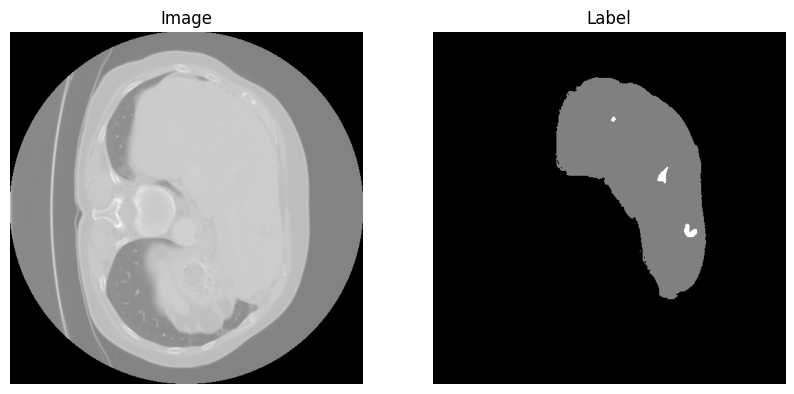

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    """显示单通道图像"""
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # 不显示坐标轴

# 假设loader是你已经创建好的DataLoader实例
# 我们只遍历一次batch来检查图片大小和维度，并展示第一个batch的图像

for images, labels in loader:
    print("image size:", images.shape)
    print("label size:", labels.shape)
    # print datatype
    print("image datatype:", images.dtype)
    print("label datatype:", labels.dtype)
    # print device
    print("image device:", images.device)
    print("label device:", labels.device)
    # 显示第一个batch的第一张图片和标签
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(images[0].squeeze().cpu().numpy(), cmap='gray')  # 图像
    axs[0].set_title('Image')
    axs[0].axis('off')

    axs[1].imshow(labels[0].cpu().numpy(), cmap='gray')  # 标签
    axs[1].set_title('Label')
    axs[1].axis('off')

    plt.show()

    break  # 只展示第一个batch，所以之后退出循环


In [17]:
# 实例化模型并传入图像和掩码路径
model = UNetTestModel(image_path=image_paths, label_path=label_paths)

# 训练模型
trainerTest = L.Trainer(max_epochs=50)
trainerTest.fit(model, train_dataloaders=loader, val_dataloaders=valid_loader)


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name           | Type               | Params
------------------------------------------------------
0 | model          | Unet               | 24.4 M
1 | train_accuracy | MulticlassAccuracy | 0     
2 | train_Dice     | Dice               | 0     
3 | val_accuracy   | MulticlassAccuracy | 0     
4 | val_Dice       | Dice               | 0     
------------------------------------------------------
24.4 M    Trainable params
0         Non-trainable params
24.4 M    Total params
97.722    Total es

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=50` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


mask unique: tensor([0, 1, 2])
prediction unique: tensor([0, 1, 2])
prediction shape: torch.Size([1, 512, 512])


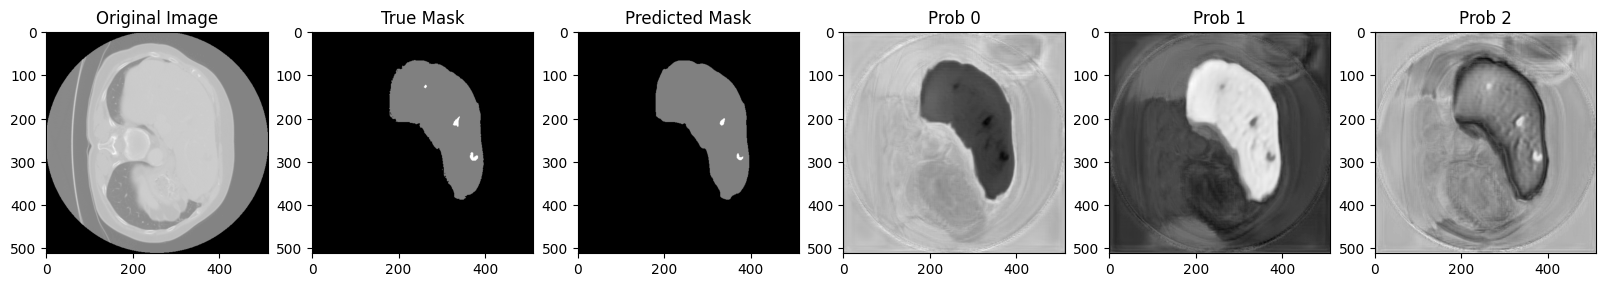

In [18]:
import matplotlib.pyplot as plt
import torch

# 确保在这一步之前已经定义并训练了 model 和 train_loader

# 从数据加载器中获取一批数据
batch = next(iter(loader))
images, masks = batch

# 选择用于预测的图片和掩码
image = images[0].unsqueeze(0)  # 添加批次维度
mask = masks[0]

# 确保模型处于评估模式
model.eval()

# 将图像移动到模型所在的设备上
device = next(model.parameters()).device  # 获取模型的设备
image = image.to(device)

# 进行预测
with torch.no_grad():
    pred = model(image)
    prediction = torch.argmax(pred, dim=1).cpu()  # 获取预测类别并移回CPU

# 可视化
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
axs[0].imshow(image.squeeze().cpu().numpy(), cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(mask.cpu().numpy(), cmap='gray')
axs[1].set_title('True Mask')
print(f'mask unique: {torch.unique(mask)}')

axs[2].imshow(prediction[0].numpy(), cmap='gray')
axs[2].set_title('Predicted Mask')
print(f'prediction unique: {torch.unique(prediction)}')
print(f'prediction shape: {prediction.shape}')

axs[3].imshow(pred[0][0].numpy(), cmap='gray')
axs[3].set_title('Prob 0')
axs[4].imshow(pred[0][1].numpy(), cmap='gray')
axs[4].set_title('Prob 1')
axs[5].imshow(pred[0][2].numpy(), cmap='gray')
axs[5].set_title('Prob 2')
plt.show()
